Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')
import os,zipfile
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import itertools,warnings,random
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [ ]:
'''!pip uninstall keras -y
!pip uninstall tensorflow -y
!pip install keras==2.3.1
!pip install tensorflow==2.2.0'''

Uninstalling Keras-2.4.3:
  Successfully uninstalled Keras-2.4.3
Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 378kB 15.2MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.


     |████████████████████████████████| 516.2MB 31kB/s 
     |████████████████████████████████| 460kB 43.9MB/s 
     |████████████████████████████████| 3.0MB 42.1MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1


In [ ]:
import keras
print(keras.__version__)

2.3.1


Unzipping zip files

In [ ]:
filename=['train','test1']
for file in filename:
  with zipfile.ZipFile('/content/drive/MyDrive/{}.zip'.format(file),'r') as z:
    z.extractall('.')
    print('{} folder extracted'.format(file))


train folder extracted
test1 folder extracted


In [ ]:

path_train='/content/train/'
path_test='/content/test1/'
train_image=list()
test_image=list()
train=os.listdir(path_train)
test=os.listdir(path_test)
print('There are {} images in training dataset'.format(len(train)))
print('There are {} images in testing dataset'.format(len(test)))
print('Format of Image in Training Dataset')
for train_img in train[:3]:
  train_image.append(train_img)
print(train_image)
print('Format of Image in Testing Dataset')
for test_img in test[:3]:
  test_image.append(test_img)
print(test_image)


There are 25000 images in training dataset
There are 12500 images in testing dataset
Format of Image in Training Dataset
['cat.8393.jpg', 'cat.1186.jpg', 'cat.3697.jpg']
Format of Image in Testing Dataset
['6389.jpg', '4345.jpg', '1110.jpg']


There are 25000 images which will be used for training CNN.<br>
There are 12500 images which will be used to predict the dogs or cats categories.<br>
As expected there are no categories of dogs and cats in test dataset and the model will predict the category after learning the nuances of features

Loading Dataset and Preparing for dataframe

Lets get the hang of dataset

In [ ]:
dataset_train.head()

,FileName,Target
0,cat.8393.jpg,cat
1,cat.1186.jpg,cat
2,cat.3697.jpg,cat
3,dog.2686.jpg,dog
4,cat.1464.jpg,cat


In [ ]:
print(dataset_train.shape)

(25000, 2)


Now we have got a dataframe with images and labels.<br>
First lets see the distribution of animals in target dataset

dog    12500
cat    12500
Name: Target, dtype: int64

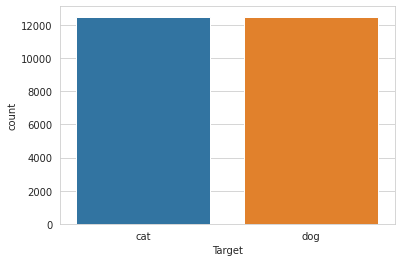

In [ ]:
sns.countplot(dataset_train['Target'])
dataset_train.Target.value_counts()

Splitting the dataset and labels

In [ ]:
IMG_WIDTH=128
IMG_HEIGHT=128
CHANNELS=3


Lets display some images

(-0.5, 499.5, 373.5, -0.5)

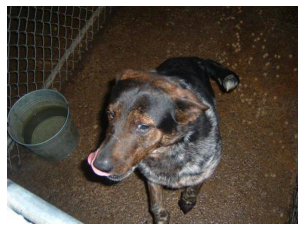

In [ ]:
    sample=random.choice(train)
    img=load_img('/content/train/'+sample)
    plt.imshow(img)
    plt.axis('Off')




In [ ]:
dataset_train['Target'].value_counts()

dog    12500
cat    12500
Name: Target, dtype: int64

Splitting the dataset into training and validation sets.<br>
We will add a seed to guarantee reproducibility

In [ ]:
random_seed=2

train_df,test_df=train_test_split(dataset_train,test_size=0.15,random_state=random_seed)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(21250, 2)
(3750, 2)


Modelling the data<br>
We will be using CNN to train the network.<br>
We will be using 4 layers each with x2 of previous layer.

In [ ]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(5,5),input_shape=(IMG_WIDTH,IMG_HEIGHT,CHANNELS),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(512,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer=RMSprop(learning_rate=0.001,rho=0.9),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization_21 (Batc (None, 124, 124, 64)      256       
_________________________________________________________________
dropout_26 (Dropout)         (None, 124, 124, 64)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 58, 58, 128)       204928    
_________________________________________________________________
batch_normalization_22 (Batc (None, 58, 58, 128)       512       
_________________________________________________________________
dropout_27 (Dropout)         (None, 58, 58, 128)      

In [ ]:
train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)

Augmenting the Images<br>
We Augment the images to produce more images from a single image.<br>
This technique is used when we have limited set of images and we want to achieve a high validation accuracy


In [ ]:
batch_size=64
epochs=20

In [ ]:
train_gen=ImageDataGenerator(zca_epsilon=1e-04,rotation_range=10,width_shift_range=0.08,
                            height_shift_range=0.08,shear_range=0.3,zoom_range=0.1,rescale=1./255)
train_generator=train_gen.flow_from_dataframe(train_df,'/content/train/',x_col='FileName',y_col='Target',target_size=(IMG_WIDTH,IMG_HEIGHT),class_mode='categorical',batch_size=batch_size)

Found 21250 validated image filenames belonging to 2 classes.


In [ ]:
test_gen=ImageDataGenerator(rescale=1./255)
test_generator=test_gen.flow_from_dataframe(test_df,'/content/train/',x_col='FileName',y_col='Target',target_size=(IMG_WIDTH,IMG_HEIGHT),class_mode='categorical',batch_size=batch_size)


Found 3750 validated image filenames belonging to 2 classes.


Setting Callbacks.<br>
We will set EarlyStopping to stop the learning after 10 epochs<br>
We will set ReduceLRPlateau to reduce learning rate if the accuracy is not improved after 3 epochs

In [ ]:
Early_Stopping=EarlyStopping(patience=10)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,min_lr=0.00001)
callbacks=[Early_Stopping,Reduce_LR]

Fitting the model

In [ ]:
train_records=train_df.shape[0]
test_records=test_df.shape[0]
history=model.fit_generator(train_generator,epochs=epochs,steps_per_epoch=train_records//batch_size,
                            validation_data=test_generator,validation_steps=test_records//batch_size,callbacks=callbacks)

Epoch 1/20
332/332 [==============================] - 159s 478ms/step - loss: 1.1869 - accuracy: 0.6062 - val_loss: 3.1092 - val_accuracy: 0.4954
Epoch 2/20
332/332 [==============================] - 152s 458ms/step - loss: 0.5277 - accuracy: 0.7473 - val_loss: 0.5790 - val_accuracy: 0.6753
Epoch 3/20
332/332 [==============================] - 152s 457ms/step - loss: 0.4058 - accuracy: 0.8212 - val_loss: 1.1566 - val_accuracy: 0.5955
Epoch 4/20
332/332 [==============================] - 152s 458ms/step - loss: 0.3509 - accuracy: 0.8504 - val_loss: 1.3993 - val_accuracy: 0.6104
Epoch 5/20
332/332 [==============================] - 152s 457ms/step - loss: 0.3058 - accuracy: 0.8761 - val_loss: 0.7926 - val_accuracy: 0.7216
Epoch 6/20
332/332 [==============================] - 152s 458ms/step - loss: 0.2837 - accuracy: 0.8856 - val_loss: 1.7344 - val_accuracy: 0.6609
Epoch 7/20
332/332 [==============================] - 151s 456ms/step - loss: 0.2600 - accuracy: 0.8985 - val_loss: 0.5358 -

In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])

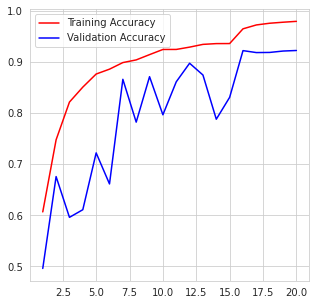

In [ ]:
plt.figure(figsize=(5,5))
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,len(val_acc)+1)
plt.plot(epochs,acc,color='red',label='Training Accuracy')
plt.plot(epochs,val_acc,color='blue',label='Validation Accuracy')
plt.legend(loc='best')


<Figure size 432x288 with 0 Axes>

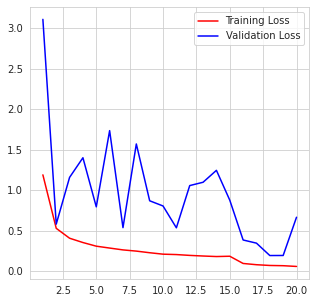

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,len(val_acc)+1)
plt.plot(epochs,loss,color='red',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',label='Validation Loss')
plt.legend(loc='best')

Preparing the testing data

In [ ]:
path_test='/content/test1/'
test_filenames=os.listdir(path_test)
submission_df=pd.DataFrame({'FileName':test_filenames})

In [ ]:
submission_df.head()

,FileName
0,6389.jpg
1,4345.jpg
2,1110.jpg
3,9870.jpg
4,3200.jpg


In [ ]:
test_gen=ImageDataGenerator(rescale=1./255)
test_generator=test_gen.flow_from_dataframe(submission_df,path_test,x_col='FileName',y_col=None,class_mode=None,
                                            target_size=(IMG_WIDTH,IMG_HEIGHT),batch_size=batch_size,shuffle=False)

Found 12500 validated image filenames.


In [ ]:
total_samples=submission_df.shape[0]
predict=model.predict_generator(test_generator,steps=np.ceil(total_samples/batch_size))

In [ ]:
submission_df['category']=np.argmax(predict,axis=1)

In [ ]:
submission_df['category'].value_counts()

1    6546
0    5954
Name: category, dtype: int64

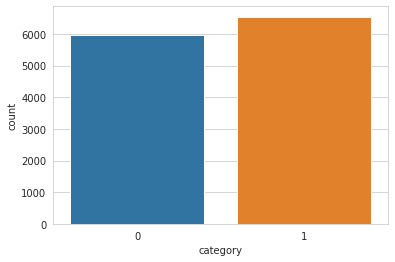

In [ ]:
sns.countplot(submission_df['category'])

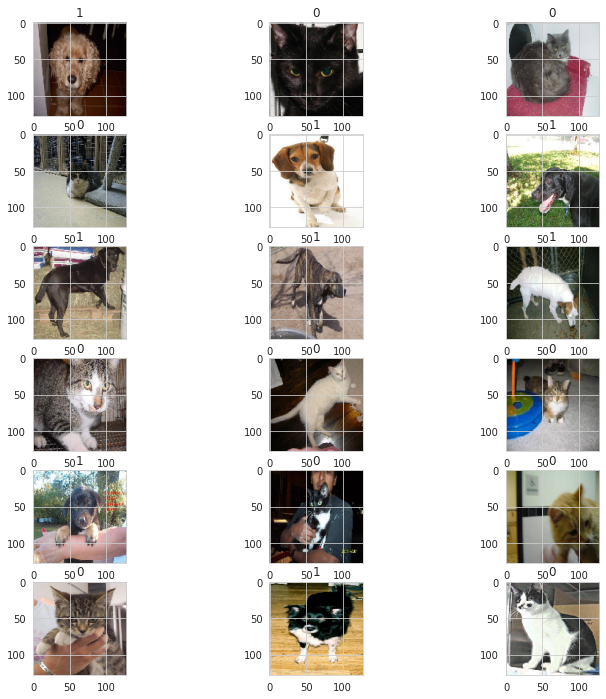

In [ ]:
sample_test=submission_df.head(18)
plt.figure(figsize=(12,12))
for index,row in sample_test.iterrows():
  filename=row['FileName']
  category=row['category']
  img=load_img('/content/test1/'+filename,target_size=(IMG_WIDTH,IMG_HEIGHT))
  plt.subplot(6,3,index+1)
  plt.imshow(img)
  plt.title(category)


